In [172]:
# set up and dependencies
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.types import Date
from sqlalchemy.orm import Session
from sqlalchemy import func
from sqlalchemy.sql.expression import extract
import pandas as pd 
from scipy.stats import ttest_ind
import numpy as np


%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [173]:
# set up Base

Base = declarative_base()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [174]:
#create class for measurement table

class Measurement(Base):
    __tablename__ = "measurement"
    
    id = Column(Integer, primary_key=True)
    station = Column(String)
    date = Column(Date)
    prcp = Column(Float)
    tobs = Column(Float)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [175]:
#create class for station table

class Station(Base):
    __tablename__ = "station"
    
    id = Column(Integer, primary_key=True)
    station = Column(String)
    name = Column(String)
    latitude = Column(Float)
    longitude = Column(Float)
    elevation =  Column(Float)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [176]:
# create engine and session to link to the database

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
session = Session(bind=engine) # If something breaks, check here <-

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Temperature Analysis I

In [177]:
# get all temperatures during June at all stations in all years

june_temps = session.query(Measurement.date, Measurement.tobs)\
    .filter(extract("month", Measurement.date) == "6").all()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [178]:
# convert to dataframe
june_temps = pd.DataFrame(june_temps, columns = ["Date", "Temperature"])

june_temps


,Date,Temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [179]:
# get average June temperature
june_avg = june_temps["Temperature"].mean()
june_avg

74.94411764705882

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [180]:
# get the average temperature in December at all stations in all years

dec_temps = session.query(Measurement.date, Measurement.tobs)\
    .filter(extract("month", Measurement.date) == "12").all()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [181]:
# convert to dataframe
dec_temps = pd.DataFrame(dec_temps, columns = ["Date", "Temperature"])

dec_temps

,Date,Temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [182]:
# get average December temperature
dec_avg = dec_temps["Temperature"].mean()
dec_avg

71.04152933421226

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [183]:
# create temp variables from each dataframe

june = june_temps["Temperature"]

dec = dec_temps["Temperature"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [184]:
# use the t-test to determine whether the difference in the means, if any, is statistically significant

results = ttest_ind(june, dec)

results

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### T-test:

Above, a paired t-test was used to calculate the means of two different independent samples: temperature for June vs temperature for December across all available years in the dataset. 

Results: t = 31.60, p = 3.90

Concluion: With the p-value exceeding the 0.05 level of significance, there is not sufficient evidence to conclude that there is a significant difference in means between June and December temperatures across all years available. 

### Temperature Analysis II

In [185]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.round(func.avg(Measurement.tobs)), func.max(Measurement.tobs))\
        .filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()[0]

# display temp data for dates provided
trip_temps = calc_temps("2017-06-10", "2017-06-20")
trip_temps

(72.0, 77.0, 83.0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [186]:
# convert to dataframe for plotting

keys = ["Min", "Avg", "Max"]

dict_temps = {keys[i]: trip_temps[i] for i in range(len(trip_temps))}

temp_df = pd.DataFrame.from_dict(dict_temps, orient="index", columns=["Temp"])

temp_df

,Temp
Min,72.0
Avg,77.0
Max,83.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

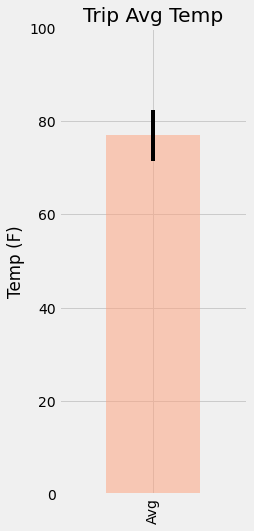

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [187]:
# plot average temp as a bar plot with peak to peak
# calculate standard deviation to plot yerr
min_max = [72, 83]
temp_std = np.std(min_max)
error = temp_std

# plot bar char
temp_df[1:2].plot(kind="bar", figsize=(3,8), ylim=(0,100), color="lightsalmon", alpha=0.5, legend=False, yerr=error)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.savefig("Images/avg_temp_bonus")
plt.show()

### Daily Rainfall Average

In [188]:
# calculate the rainfall per weather station using previous year's matching dates

prcp_2016 = session.query(Measurement.station, func.round(func.sum(Measurement.prcp), 2))\
    .filter(Measurement.date > '2016-06-10')\
    .filter(Measurement.date <= '2016-06-20')\
    .order_by(Measurement.date).group_by(Measurement.station).all()

prcp_2016

[('USC00513117', 1.05),
 ('USC00514830', 1.22),
 ('USC00516128', 6.27),
 ('USC00519281', 2.5),
 ('USC00519397', 0.08),
 ('USC00519523', 0.56),
 ('USC00517948', 0.6)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [189]:
# define daily normals function

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    return session.query(func.min(Measurement.tobs), func.round(func.avg(Measurement.tobs)), func.max(Measurement.tobs))\
    .filter(func.strftime("%m-%d", Measurement.date) == date).all()[0]
    
daily_normals("01-01")

(62.0, 69.0, 77.0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [191]:
# create a list of dates for the trip

trip_dates = ["06-10", "06-11", "06-12", "06-13", "06-14", "06-15", "06-16", "06-17", "06-18", "06-19", "06-20"]

# use daily normals function to calculate temp for each date in trip_dates and append to list

trip_results = []

for i, date in enumerate(trip_dates):
    
    trip_temps = daily_normals(date)
    
    trip_results.append(trip_temps)
    
print(trip_results)

[(68.0, 75.0, 81.0), (69.0, 76.0, 84.0), (66.0, 76.0, 83.0), (68.0, 76.0, 81.0), (69.0, 76.0, 81.0), (67.0, 75.0, 81.0), (69.0, 75.0, 81.0), (68.0, 75.0, 81.0), (69.0, 75.0, 80.0), (70.0, 75.0, 82.0), (68.0, 74.0, 85.0)]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [193]:
# create dict of dates and tobs for trip dates

trip_temps_dict = {trip_dates[i]: trip_results[i] for i in range(len(trip_results))}

trip_temps_dict

{'06-10': (68.0, 75.0, 81.0),
 '06-11': (69.0, 76.0, 84.0),
 '06-12': (66.0, 76.0, 83.0),
 '06-13': (68.0, 76.0, 81.0),
 '06-14': (69.0, 76.0, 81.0),
 '06-15': (67.0, 75.0, 81.0),
 '06-16': (69.0, 75.0, 81.0),
 '06-17': (68.0, 75.0, 81.0),
 '06-18': (69.0, 75.0, 80.0),
 '06-19': (70.0, 75.0, 82.0),
 '06-20': (68.0, 74.0, 85.0)}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [195]:
# convert dict to dataframe

trip_df = pd.DataFrame.from_dict(trip_temps_dict, orient="index", columns=["Min", "Avg", "Max"])

trip_df

,Min,Avg,Max
06-10,68.0,75.0,81.0
06-11,69.0,76.0,84.0
06-12,66.0,76.0,83.0
06-13,68.0,76.0,81.0
06-14,69.0,76.0,81.0
06-15,67.0,75.0,81.0
06-16,69.0,75.0,81.0
06-17,68.0,75.0,81.0
06-18,69.0,75.0,80.0
06-19,70.0,75.0,82.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>